In [1]:
%matplotlib inline
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import RandomRotation
from keras import backend as K


# You will need to set this path according to where you've stored the data set on your machine!
filename = "/data/wbc/A3net/hack2/" + 'cluster_TNG_data.fits'
hdul = fits.open(filename)

image_size = hdul[1].data.shape[1]

train_ind = np.argwhere(hdul[2].data['train'] == 1)
train_X = hdul[1].data[train_ind].reshape(-1, image_size, image_size, 1)
train_Y = hdul[2].data['log_M500'][train_ind]

val_ind = np.argwhere(hdul[2].data['validate'] == 1)
val_X = hdul[1].data[val_ind].reshape(-1, image_size, image_size, 1)
val_Y = hdul[2].data['log_M500'][val_ind]

test_ind = np.argwhere(hdul[2].data['test'] == 1)
test_X = hdul[1].data[test_ind].reshape(-1, image_size, image_size, 1)
test_Y = hdul[2].data['log_M500'][test_ind]

norm = np.nanmin(hdul[2].data['log_M500'])
train_Y -= norm
val_Y -= norm
test_Y -= norm

input_shape = (image_size, image_size, 1)

2024-09-08 13:44:24.559444: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-08 13:44:25.575289: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-08 13:44:25.983264: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-08 13:44:26.104572: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-08 13:44:26.799538: I tensorflow/core/platform/cpu_feature_guar

In [2]:
model = Sequential()
model.add(RandomRotation(0.2, input_shape=input_shape, fill_mode='reflect'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.1))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(100, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='linear'))

/home/wbc/AuhUf/apps/anaconda/anaconda3/envs/hack2/lib/python3.11/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2024-09-06 08:06:00.221606: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [3]:
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam())#lr=0.0002

In [4]:
epochs = 100
batch_size = 16 #lower this value if you get a memory error
hist = model.fit(train_X, train_Y, validation_data = (val_X, val_Y), batch_size=batch_size, verbose=True, epochs=epochs)

Epoch 1/100


50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 128ms/step - loss: 11.0284 - val_loss: 0.0313
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step - loss: 4.4876 - val_loss: 0.0455
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - loss: 7.0065 - val_loss: 0.0455
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - loss: 2.1534 - val_loss: 0.1189
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 106ms/step - loss: 0.1996 - val_loss: 0.0495
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - loss: 0.1952 - val_loss: 0.0232
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 116ms/step - loss: 0.3007 - val_loss: 0.0481
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - loss: 0.1187 - val_loss: 0.0249
Epoch 9/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 118ms/step - loss: 0.0651 - val_loss: 0.0209
Epoch 10/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - loss: 0.0594 - val_loss: 0.0293
Epoch 11/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 108ms/step - loss: 0.0873 - val_loss: 0.0253
Epoch 12/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/st

0.0030965040292768764


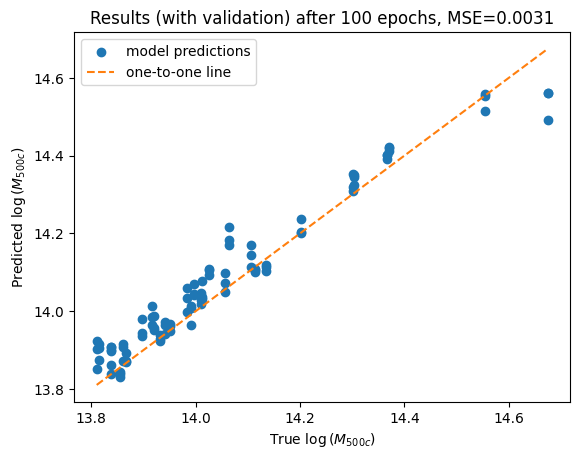

In [5]:
prediction = model.predict(test_X, verbose=0, batch_size=batch_size).flatten()
# Remember when we subtracted off the min in an earlier cell?  In the next line, we're putting it back in!

truevalue = test_Y + norm
predvalue = prediction + norm
truevalue = truevalue.flatten()

Ss = 0
for ts, ps in zip(truevalue, predvalue):
    Ss = Ss + (ts - ps)**2
MSE = Ss / len(truevalue)
print(MSE)

plt.scatter(test_Y + norm, prediction + norm, c='C0', label='model predictions')
x = np.linspace(np.min(test_Y+norm), np.max(test_Y+norm), 100)
plt.plot(x,x,ls='--', c='C1', label='one-to-one line')
plt.xlabel('True '+r'$\log\left(M_{500c}\right)$')
plt.ylabel('Predicted '+r'$\log\left(M_{500c}\right)$')
plt.title('Results (with validation) after {:.0f} epochs, MSE={:.4f}'.format(epochs, MSE))
plt.legend()

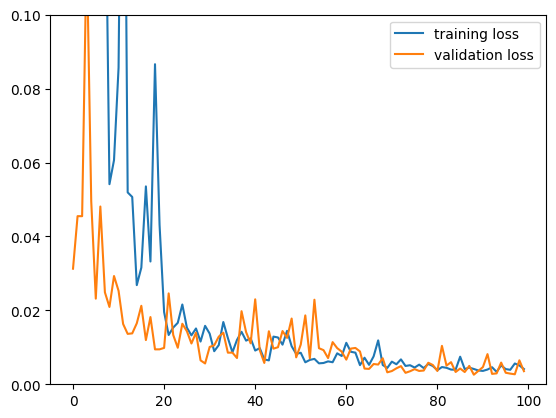

In [6]:
plt.plot(hist.history['loss'], label='training loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.ylim(0,0.1)
plt.legend()